In [19]:
%matplotlib inline

In [28]:
from domino.slices import collect_settings
from domino.train import score_model, score_settings

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#setting_dp = collect_settings.out(load=True)
setting_dp = score_settings.out(load=True)[0]
setting_dp

,train_model_run_id (PandasSeriesColumn),setting_id (PandasSeriesColumn),build_setting_kwargs (ListColumn),dataset (PandasSeriesColumn),target_name (PandasSeriesColumn),slice_names (ListColumn),index (PandasSeriesColumn),slice_category (PandasSeriesColumn),alpha (NumpyArrayColumn),train_settings_run_id (PandasSeriesColumn),score_settings_run_id (PandasSeriesColumn),score_model_run_id (PandasSeriesColumn),synthetic_preds (PandasSeriesColumn)
0,8155,ead6e4e7-c052-412e-a434-e2693d0dc940,"{'correlate': 'chest_tube', 'corr': 0.0, 'correlate_threshold': None, 'n': 675}",cxr,pmx,"['pmx=0_chest_tube', 'pmx=1_chest_tube']",0,correlation,0.0,8154,8158,8159,False
1,8157,46817d24-5999-41ab-9868-2245bf766743,"{'correlate': 'chest_tube', 'corr': 0.8, 'correlate_threshold': None, 'n': 675}",cxr,pmx,"['pmx=0_chest_tube', 'pmx=1_chest_tube']",1,correlation,0.8,8154,8158,8160,False


Text(0.5, 0, 'alpha')

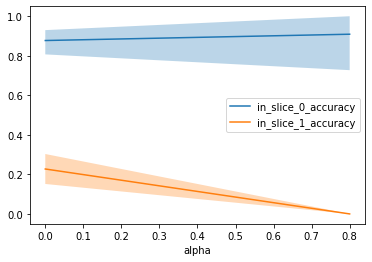

In [35]:
slice_type = "correlation"

setting_dp_ = setting_dp[setting_dp["slice_category"] == slice_type]
alphas = []

slice0_mean = []
slice0_upper = []
slice0_lower = []

slice1_mean = []
slice1_upper = []
slice1_lower = []

for row in setting_dp_:
    alphas.append(row["alpha"])
    metrics = score_model.out(row["score_model_run_id"])[1]

    if slice_type=="correlation":
        slice0_key = "in_slice_0_accuracy"
        slice1_key = "in_slice_1_accuracy"

    slice0_mean.append(metrics[f"{slice0_key}_mean"])
    slice0_upper.append(metrics[f"{slice0_key}_upper"])
    slice0_lower.append(metrics[f"{slice0_key}_lower"])

    slice1_mean.append(metrics[f"{slice1_key}_mean"])
    slice1_upper.append(metrics[f"{slice1_key}_upper"])
    slice1_lower.append(metrics[f"{slice1_key}_lower"])


plt.plot(alphas,slice0_mean)
plt.fill_between(alphas, slice0_upper, slice0_lower, alpha=0.3)

plt.plot(alphas,slice1_mean)
plt.fill_between(alphas, slice1_upper, slice1_lower, alpha=0.3)

plt.legend([slice0_key,slice1_key])

plt.xlabel("alpha")